## **ドライブをマウント**

<font color= "green">from google.colab import drive</font>で自分のドライブをマウントする。


1.   **実行時**、URLが表示されるので**URLをクリック**。
2.   自分のアカウントを選択し**ログイン**をクリック。
3.   **認証の文字列**が表示されるので**コピー**する。
4.   **Colabに戻り**「Enter your authorization code:」の下にある**テキストボックスに貼り付け**「Enter」を押下

### 上記の手順ではない場合
1.   **Googleドライブに接続する**というポップアップが表示された場合
2.   Googleドライブに接続するをクリック
3.   自分のアカウントを選択し、許可を押下。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **PyDriveをインストール**

Python上でGoogleドライブに接続するためのライブラリをインストール

<font color= "green">google-api-python-client</font>でもPythonからGoogle APIを利用することができるが、今回は<font color= "green">PyDrive</font>を使用する。

>PyDriveは、 Google Drive APIへの操作部分に特化したラッパーライブラリ。
PyDriveにはgoogle-api-python-clientが含まれている。

[参考：PyDriveとは](https://python.keicode.com/advanced/pydrive.php#:~:text=PyDrive%20%E3%81%AF%20Google%20Drive%20API,%E3%81%AB%E8%A8%AD%E8%A8%88%E3%81%95%E3%82%8C%E3%81%A6%E3%81%84%E3%81%BE%E3%81%99%E3%80%82)

In [2]:
pip install -U -q PyDrive

## **GoogleクラウドSDKの認証**

<font color= "green">auth.authenticate_user()</font>を実行すると**Googleのユーザー認証を行うURL**が生成される



1.   **実行後**、URLが表示されるので**URLをクリック**
2.   自分のアカウントを選択。
3.   **許可**を押し、**認証コード**が発行されるので**コピー**する
4.   Colabに戻り「Enter your authorization code:」の下にあるテキストボックスに貼り付け「Enter」を押下





In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## **共有アイテムからファイルを読み込みColab上に保管**

*   <font color= "purple">TEPCO_2019_ID</font> = 2019年、東京電力の電力実績が記載されたCSVファイルのID
    *    ファイル名：juyo-result-2019-j.csv
*   <font color= "purple">TEPCO_2020_ID</font> = 2020年、東京電力の電力実績が記載されたCSVファイルのID
    *    ファイル名：juyo-result-2020-j.csv
*   <font color= "purple">TEMP_ID</font> = 2019年から2020年、東京の平均気温が記載されたCSVファイルのID
    *    ファイル名： temperature-data.csv

<font color= "red">※ファイルをColab上でダウンロードする際は必ずIDを確認する。</font>



1.   ファイルのIDを変数として格納
2.   <font color= "green">CreateFile()</font>でGoogleDriveFileオブジェクトを作成
3.   <font color= "green">GetContentFile()</font>でGoogleDriveFileオブジェクトを保存


In [4]:
# フォルダIDを格納
TEPCO_2019_ID = '<your file ID>'
TEPCO_2020_ID = '<your file ID>' 
TEMP_ID = '<your file ID>' 

# Googleドライブファイルオブジェクトを生成
downloaded_tepco_2019 = drive.CreateFile({'id': TEPCO_2019_ID})
downloaded_tepco_2020 = drive.CreateFile({'id': TEPCO_2020_ID})
downloaded_temp = drive.CreateFile({'id': TEMP_ID})

# GoogleドライブファイルオブジェクトをColab上に保存
downloaded_tepco_2019.GetContentFile('juyo-result-2019-j.csv')
downloaded_tepco_2020.GetContentFile('juyo-result-2020-j.csv')
downloaded_temp.GetContentFile('temperature-data.csv')

## **ファイルを読み込み変数として格納**

*   <font color= "green">read_csv()</font>でCSVファイルを読み込み変数として格納
*   <font color= "green">encoding="shift-jis"</font>で日本語文字化け対応
*   <font color= "green">skiprows</font>で不要な行を削除
*   <font color= "green">usecols</font>で不要な列を削除

<font color= "purple">juyo_result_2019_data</font>は「juyo-result-2019-j.csv」2019年の電力実績が格納される。

<font color= "purple">juyo_result_2020_data</font>は「juyo-result-2020-j.csv」2019年の電力実績が格納される。

<font color= "purple">temperature_data</font>は「temperature-data.csv」2019年から2020年の月平均気温が格納される。

In [5]:
import pandas as pd
import io

# Colab上に保存されたCSVファイルを読み込み
# pandas.core.frame.DataFrame型の値として保管
juyo_result_2019_data = pd.read_csv('juyo-result-2019-j.csv', encoding="shift-jis", skiprows=2, usecols=[0, 3])
juyo_result_2020_data = pd.read_csv('juyo-result-2020-j.csv', encoding="shift-jis", skiprows=2, usecols=[0, 3])
temperature_data = pd.read_csv('temperature-data.csv', encoding="shift-jis", skiprows=[0, 1, 2, 4], usecols=[0, 1])

## **データの加工**

*   <font color= "purple">temperature_data</font>の日付カラムを<font color= "purple">juyo_result</font>のデータと合わせて「DATE」に変更。

*   <font color= "green">to_datetime</font>で日付の文字列データを日付データに変更。
    *   無効なデータがあった場合のため、<font color= "green">coerce</font>を指定
    *   <font color= "green">format="%Y-%m-%d"</font>でフォーマットを指定
*   <font color= "purple">juyo_result_list</font>に二つに分かれている電力実績のデータをリストとして格納
*   <font color= "green">concat</font>で二つのデータを一つのデータとして連結される。
    *   <font color= "green">axis=0</font>で縦方向に連結させる。
    *   <font color= "green">ignore_index=True</font>を指定して連結方向のラベルを0から振りなおす。

*   以下の、<font color= "green">set_index</font>でindexを数字からDATEの日付に変更。
    *   変更の理由は後で、電力実績を月平均化させる時に変更しておく必要があるため。

```temperature_data = temperature_data.set_index(['DATE'])```

```juyo_result_data = juyo_result_data.set_index(['DATE'])```

*   <font color= "green">resampleとmean</font>で平均を求める。
    *   <font color= "green">rule="MS"</font>のMは月で平均を求め、Sは月の最初を指定
    *   roundは小数点以下を省略


In [6]:
# カラム名の変更
temperature_data.columns = ['DATE' , '平均気温(℃)']

# 日付カラムを文字列から日付データ型に変換
juyo_result_2019_data["DATE"] = pd.to_datetime(juyo_result_2019_data["DATE"], format="%Y-%m-%d", errors='coerce')
juyo_result_2020_data["DATE"] = pd.to_datetime(juyo_result_2020_data["DATE"], format="%Y-%m-%d", errors='coerce')
temperature_data["DATE"] = pd.to_datetime(temperature_data["DATE"], format="%Y-%m-%d", errors='coerce')

# juyo_result_2019_data と juyo_result_2020_dataを連結
juyo_result_list = [juyo_result_2019_data, juyo_result_2020_data]
juyo_result_data = pd.concat(juyo_result_list, axis=0, ignore_index=True)

# indexをDATEに変更
temperature_data = temperature_data.set_index(['DATE'])
juyo_result_data = juyo_result_data.set_index(['DATE'])

# 電力実績を月平均として保管する
juyo_result_data = round(juyo_result_data.resample(rule="MS").mean())

# 追加実装箇所
## 2021年のデータを予測する

*   2020年データ - 2019年データ = diff
*   2019年データ + 2020年データ = mean
*   2021年データ = mean + diff

In [7]:
# 平均算出時に小数第一位まで表示
pd.options.display.float_format = '{:.1f}'.format

# データ予測を行い2021年度のデータをDataFrame形式で格納
def add_2021_Datas(monthnum):

  # 2019年と2020年の平均を算出
  temp_mean_date = temperature_data[temperature_data.index.month == monthnum].mean()
  juyo_mean_date = juyo_result_data[juyo_result_data.index.month == monthnum].mean()

  # String形式にキャスト
  monthstr = str(monthnum)

  # DataFrame型をリスト型に変換
  tempdate = temperature_data['平均気温(℃)']
  juyodate = juyo_result_data['実績(万kW)']

  # 2019年と2020年の差分を計算
  # 平均-差分で2021年のデータを予測
  tempdate_y19 = tempdate['2019-'+monthstr+'-01']
  tempdate_y20 = tempdate['2020-'+monthstr+'-01']
  tempdate_diff = tempdate_y20 -tempdate_y19
  temp_new_date= temp_mean_date['平均気温(℃)'] + tempdate_diff

  juyodate_y19 = juyodate['2019-'+monthstr+'-01']
  juyodate_y20 = juyodate['2020-'+monthstr+'-01']
  juyodate_diff = juyodate_y20 -juyodate_y19
  juyo_new_date= juyo_mean_date['実績(万kW)'] + juyodate_diff

  # 予測した2021年のデータをDataFrame形式で格納
  temperature_data.loc['2021-'+monthstr+'-01'] = temp_new_date
  juyo_result_data.loc['2021-'+monthstr+'-01'] = juyo_new_date

  # フォーマットを修正
  # 修正しなかった場合次のループで平均を算出する際にエラーを起こすため必須
  temperature_data.index = pd.to_datetime(temperature_data.index, format="%Y-%m-%d", errors='coerce')
  juyo_result_data.index = pd.to_datetime(juyo_result_data.index, format="%Y-%m-%d", errors='coerce')  

for monthnum in range(1,13):
  # データ予測の関数を呼び出す
  add_2021_Datas(monthnum)

## japanize_matplotlibでグラフに日本語を表示する

グラフに日本語を表示させるために**japanize_matplotlib**をインストール。

デフォルトで日本語を使用すると文字化けしてしまう。

また、フォントを指定しても文字化けしてしまうのでこちらを使用する。

In [8]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=785351ea7c5c47a202fe384e4b95c0d8cf99467f400def62bb5995776e987e4f
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## **グラフの作成**

*   <font color= "green">**matplotlib**</font>
    *   グラフを描画するためのモジュール
*   <font color= "green">**japanize_matplotlib**</font>
    *   グラフで日本語を描画するためのモジュール
*   <font color= "green">plt.figure()</font>
    *   figsize: (width, height)のタプルを渡す。単位はインチ。
    *   dpi: 1インチあたりのドット数。
*   <font color= "green">fig.add_subplot()</font>
    *   plt.figure()にグラフを描画するためにsubplotを追加する必要がある。
    subplotの追加は、add_subplotメソッドを使用する。
    *   111の意味は、1行目1列の1番目という意味。
    *   subplotはAxesオブジェクトを返す。
*   <font color= "green">.twinx()</font>
    *   Axes.twinx()は元のAxesオブジェクトを複製する。ただし新たなAxesには横軸
    がなく縦軸が逆側にある。2つのグラフを、それぞれに対するy軸とともに重ねて表
    示したいときに使う。
*   <font color= "green">.bar、.plot</font>
    *   bar 棒グラフを作成
    *   plot 折れ線グラフを作成
    *   (x軸、y軸、color=グラフの色、width=棒の幅、label=凡例)
*   <font color= "green">.set_ylim</font>
    *   y軸の範囲を指定
*   <font color= "green">get_legend_handles_labels()
    *   凡例を表示するために，handlerとlabelを取得。
*   <font color= "green">legend</font>
    *   ax1とax2の凡例のhandlerとlabelのリストを結合して，凡例を作成
*   <font color= "green">plt.title()、plt.xlabel()、plt.ylabel()</font>
    *   タイトル、x軸ラベル、y軸ラベルを記載する。
*   <font color= "green">plt.grid()</font>
    *   グリッドを表示
*   <font color= "green">plt.show()</font>
    *   グラフを表示

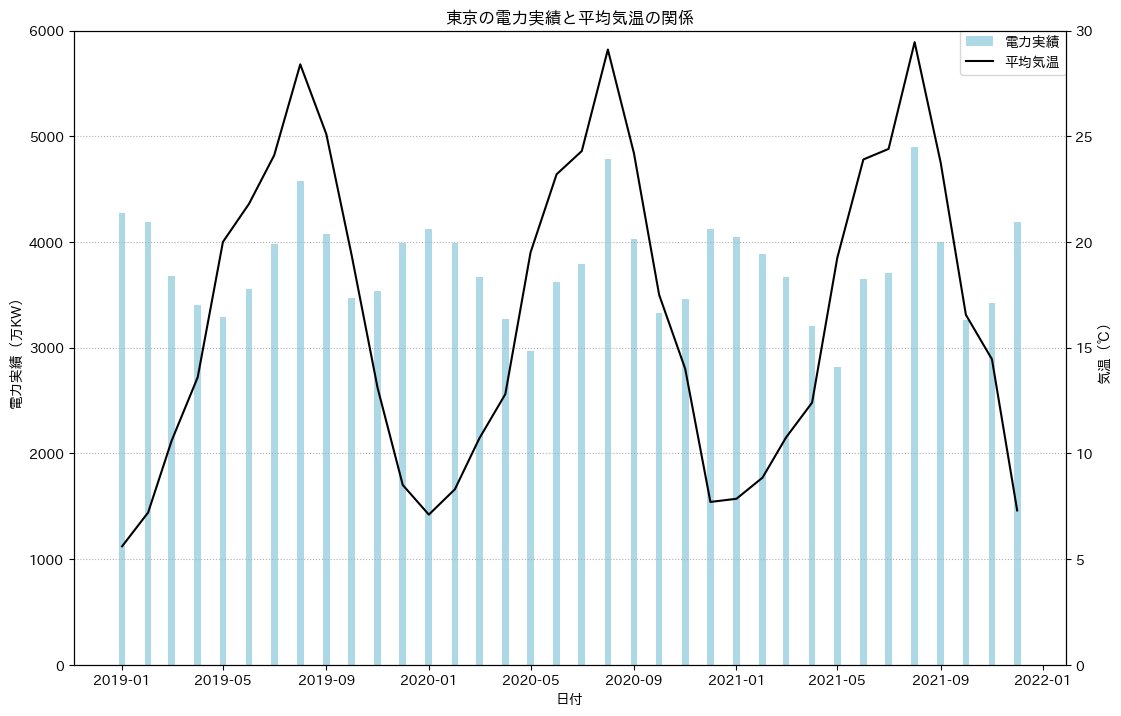

In [9]:
import matplotlib.pyplot as plt

import japanize_matplotlib

# グラフのサイズを指定
fig = plt.figure(dpi=100, figsize=(12.8,8.4))

# 2軸グラフを作成
juyo_result_ax = fig.add_subplot(111)
temperature_ax = juyo_result_ax.twinx()

# 棒グラフを作成
# y軸の範囲を指定
juyo_result_ax.bar(juyo_result_data.index, juyo_result_data['実績(万kW)'], color="lightblue", width=8, label="電力実績")
juyo_result_ax.set_ylim(0,6000)

# 折れ線グラフを作成
# y軸の範囲を指定
temperature_ax.plot(temperature_data['平均気温(℃)'],color="k",label="平均気温")
temperature_ax.set_ylim(0,30)

# 凡例を表示するためにハンドラーとラベルを取得
juyo_result_handler, juyo_result_label = juyo_result_ax.get_legend_handles_labels()
temperature_handler, temperature_label = temperature_ax.get_legend_handles_labels()

# 凡例を表示
juyo_result_ax.legend(juyo_result_handler + temperature_handler, juyo_result_label + temperature_label, loc=1, borderaxespad=0.)

# ラベル名とタイトルを指定
juyo_result_ax.set_xlabel('日付')
juyo_result_ax.set_ylabel('電力実績（万KW）')
temperature_ax.set_ylabel('気温（℃）')
plt.title('東京の電力実績と平均気温の関係')

# グリッドを表示
plt.grid(linestyle='dotted')

# グラフを表示
plt.show()

## PDFをColab上に保管する

#### pdfpagesとはLaTeXにPDFの各ページを挿入するためのパッケージ

*   <font color="green">PdfPages(pdfname.pdf)</font>
    *   pdfに書き込む準備をする
*   <font color="green">savefig(fig)</font>
    *   作成したグラフを一枚のPDFとして保存
*   <font color="green">close()</font>
    * ### ※**close()**しないとPDFが開けなくなるので注意

In [10]:
from matplotlib.backends.backend_pdf import PdfPages

# PDF書き込み準備
pdfpage = PdfPages('東京の電力実績と平均気温の関係_2019-2021.pdf')

# グラフをColab上に保存
pdfpage.savefig(fig)

# ファイルを閉じる
pdfpage.close()

## 作成したPDFをGoogleドライブの共有アイテムに保管する

*   **出力先**
    *   共有アイテム/...

*   <font color= "purple">FILE_NAME</font>
    *   Colab上に保管したPDFファイル名を指定
*   <font color= "purple">FOLDER_ID</font>
    *   Googleドライブの共有アイテム上にある格納対象フォルダーのID
*   <font color= "purple">file_metadata</font>
    *   出力するファイルの名前と種類・格納先の情報を記載
*   <font color= "green">CreateFile</font>
    *   file_metadataを元にファイルを作成
*   <font color= "green">SetContentFile</font>
    *   Colab上にに保管したファイルをアップロード
*   supportsTeamDrives
    *   チームドライブファイルを表す（共有）

In [11]:
FILE_NAME = "東京の電力実績と平均気温の関係_2019-2021.pdf"
FOLDER_ID = '<your folder ID>'

# ファイルと親フォルダ情報を記載
file_metadata = {
        'title': "東京の電力実績と平均気温の関係_2019-2021.pdf",
        'mimeType': 'application/pdf',
        'parents': [{
            'id': FOLDER_ID,
            'kind': 'drive#fileLink',
            }],
    }

# ファイルを作成
f = drive.CreateFile(file_metadata)
# 添付とアップロードを行う
f.SetContentFile(FILE_NAME)
# アップロード時のオプションを指定
f.Upload(param={'supportsTeamDrives': True})